# Case Study 1: Computational Methods in Finance

## Charles Laferte - cl4249

In [69]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate

Parameters:

In [2]:
S0 = 1900 # spot price
T = 0.25 # maturity
sigma = 0.36 # volatility
r = 0.02 # risk-free interest rate 
q = 0.0187 # continuous dividend rate

K = [2000, 2100, 2200] # price of European call option

In [7]:
print(K)

[2000, 2100, 2200]


### 1. Fast Fourier transfrom (FFT)

In [31]:
eta = 0.25
delta_nu = 0.25
alpha = [0.4, 1, 1.4, 3]

n = [9, 11, 13, 15]
N = [2**i for i in n]

lambda_ = 2*np.pi/(N*neta)

beta = np.zeros((len(N), len(K)))
for i in range(len(N)):
    for j in range(len(K)):
        beta[i,j] = np.log(K[j]) - lambda_*N[i]/2

TypeError: can't multiply sequence by non-int of type 'float'

In [96]:
eta = 0.25
delta_nu = 0.25
alpha = 1

n = 15
N = 2**n

lambda_ = 2*np.pi/(N*eta)


#beta = np.log(S0) - lambda_*N/2
beta = np.log(2000)

In [12]:
def phi(s, sigma, S0, r, q, T): # CF of log of stock price process
    
    x = -(sigma**2)*(s**2)*T/2
    y = (np.log(S0) + (r-q-sigma**2/2)*T)*s
    
    return(np.exp(complex(x,y)))
    

#def charasteristic_function(s, sigma, S0, r, q, T):
    
 #   return ( np.exp(-r*T)*phi(s-(alpa+1)j, sigma, S0, r, q, T)/(alpha+sj)/(alpha+sj+1) )
    

In [9]:
def w(j, neta):
    if j!=1:
        return (neta)
    else:
        return (neta/2)
    

In [134]:
def call_pricing_FFT(alpha, delta_nu, N, r, q, T, eta, S0): 
    
    # Param
    beta = np.log(S0)
    lambda_ = 2*np.pi*eta/(N)
    #X = [neta*np.exp(-r*T)/(alpha+(((i-1)*neta)j))/(alpha+((i-1)*neta)j+1) for i in range(N)]
    X = np.ones(N)
    X[0]=X[0]/2 # first line adjustment
    
    for i in range(len(X)):
        nu = (i-1)*eta
        #print(-beta*s)
        
        X[i] = X[i]*eta*np.exp(-r*T)/complex(alpha,nu)/complex(alpha+1,nu)
        X[i] = X[i]*np.exp(complex(0,-beta*nu))*phi(nu+complex(0,-alpha-1), sigma, S0, r, q, T)
        #print('phi', phi(nu+complex(0,-alpha-1), sigma, S0, r, q, T))
    
    #print('X')
    # Strike km for m = 1, ... ,N
    strikes = np.array([beta+(m-1)*lambda_ for m in range(1,N+1)])
    #print(strikes)
    
    # fft(x)
    Y  = np.fft.fft(X)
    
    
    # Call prices
    C = np.array([np.exp(-alpha*k)/np.pi for k in strikes])*np.real(Y)
    #print(C)
    return strikes, C

In [135]:
start_time = time.time()
strikes, C = call_pricing_FFT(alpha, delta_nu, N, r, q, T, eta, S0)
print("Computation duration: ", time.time()-start_time)
print(80*'=')
plt.plot(strikes, C)
plt.title('Call option price depending on the strike (log scale)')
plt.show()


TypeError: unsupported operand type(s) for /: 'float' and 'list'

In [100]:
strikes

array([ 7.60090246,  7.60166945,  7.60243644, ..., 32.73134272,
       32.73210971, 32.7328767 ])

In [101]:
def find_price(lk, strikes, C):
    s = np.abs(strikes-lk)
    i  = np.argmin(s)
    return strikes[i], C[i]

In [102]:
C

array([1.66755118e+02, 1.66627924e+02, 1.66502139e+02, ...,
       2.03274564e-09, 2.03114713e-09, 2.02956587e-09])

/var/folders/pr/693wddvj41v3lzy50wnq69fc0000gn/T/ipykernel_57712/2155016552.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i]*eta*np.exp(-r*T)/complex(alpha,nu)/complex(alpha+1,nu)
/var/folders/pr/693wddvj41v3lzy50wnq69fc0000gn/T/ipykernel_57712/2155016552.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i]*np.exp(complex(0,-beta*nu))*phi(nu+complex(0,-alpha-1), sigma, S0, r, q, T)


X
[ 1.66755118e+02  1.69286515e+02  1.76785384e+02  1.88292017e+02
  2.02455340e+02  2.17804341e+02  2.32995470e+02  2.46976969e+02
  2.59051239e+02  2.68852348e+02  2.76274390e+02  2.81386233e+02
  2.84356619e+02  2.85399791e+02  2.84741594e+02  2.82601212e+02
  2.79182844e+02  2.74672851e+02  2.69239542e+02  2.63034049e+02
  2.56191572e+02  2.48832695e+02  2.41064656e+02  2.32982538e+02
  2.24670378e+02  2.16202194e+02  2.07642924e+02  1.99049306e+02
  1.90470670e+02  1.81949675e+02  1.73522980e+02  1.65221861e+02
  1.57072766e+02  1.49097834e+02  1.41315354e+02  1.33740190e+02
  1.26384167e+02  1.19256417e+02  1.12363697e+02  1.05710669e+02
  9.93001642e+01  9.31334095e+01  8.72102398e+01  8.15292846e+01
  7.60881371e+01  7.08835054e+01  6.59113475e+01  6.11669924e+01
  5.66452475e+01  5.23404946e+01  4.82467746e+01  4.43578630e+01
  4.06673360e+01  3.71686290e+01  3.38550880e+01  3.07200143e+01
  2.77567035e+01  2.49584792e+01  2.23187221e+01  1.98308948e+01
  1.74885632e+01  1.528

X
[166.75511801 166.63777012 166.54148788 ...   0.31229999   0.31196231
   0.31166421]
N =  8192
Computation duration:  0.18020105361938477
X
[1.66755118e+02 1.66627924e+02 1.66502139e+02 ... 2.03274564e-09
 2.03114713e-09 2.02956587e-09]
N =  32768
Computation duration:  0.6067309379577637


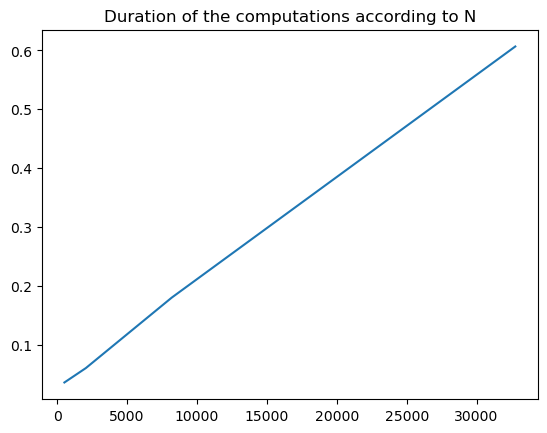

In [103]:
list_n = [9, 11, 13, 15]
l_N = []
durations =[]
for n in list_n:
    N = 2**n
    l_N.append(N)
    start_time = time.time()
    strikes, C = call_pricing_FFT(alpha, delta_nu, N, lambda_, r, q, T, beta, neta, S0)
    print(80*'=')
    print('N = ', N)
    elapsed = time.time()-start_time
    print("Computation duration: ", elapsed)
    print(80*'=')
    durations.append(elapsed)
    
plt.plot(l_N, durations)
plt.title('Duration of the computations according to N')
plt.show()

In [104]:
list_K = np.array([2000, 2100, 2200])
df_result_FFT = pd.DataFrame({'Strike K': list_K , 'log_K':np.log(list_K)})

In [105]:
temp_k_l = []
temp_C_l = []
for k in np.log(list_K):
    k_temp, C_temp = find_price(k, strikes, C)
    temp_k_l.append(k_temp)
    temp_C_l.append(C_temp)
    
df_result_FFT['log_k in computation'] = temp_k_l
df_result_FFT['Call option price'] = temp_C_l

In [106]:
df_result_FFT

,Strike K,log_K,log_k in computation,Call option price
0,2000,7.600902,7.600902,166.755118
1,2100,7.649693,7.649990,161.301009
2,2200,7.696213,7.696009,160.440663


In [78]:
## TEST 2

Premiums for various values of alpha, N and eta

In [136]:
alpha = [0.4, 1, 1.4, 3]
K = 2000
n = [9, 11, 13, 15]
N = [2**i for i in n]
df_values = pd.DataFrame({'Alpha':alpha})


In [137]:
for n_ in n: 
    print('n',n_)
    l=[]
    for a in alpha:
        strikes_values, C_values =  call_pricing_FFT(a, delta_nu, 2**n_, r, q, T, eta, S0)
        
        #print(np.log(K))
        #print(strikes_values)
        k_temp, C_temp = find_price(np.log(K), strikes_values, C_values)
        l.append(C_temp)
    
    df_values['N=2**'+str(n_)]=l
        



n 9
n 11
n 13


/var/folders/pr/693wddvj41v3lzy50wnq69fc0000gn/T/ipykernel_57712/2413557035.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i]*eta*np.exp(-r*T)/complex(alpha,nu)/complex(alpha+1,nu)
/var/folders/pr/693wddvj41v3lzy50wnq69fc0000gn/T/ipykernel_57712/2413557035.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i]*np.exp(complex(0,-beta*nu))*phi(nu+complex(0,-alpha-1), sigma, S0, r, q, T)
/var/folders/pr/693wddvj41v3lzy50wnq69fc0000gn/T/ipykernel_57712/2413557035.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i]*eta*np.exp(-r*T)/complex(alpha,nu)/complex(alpha+1,nu)
/var/folders/pr/693wddvj41v3lzy50wnq69fc0000gn/T/ipykernel_57712/2413557035.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i]*np.exp(complex(0,-beta*nu))*phi(nu+complex(0,-alpha-1), sigma, S0, r, q, T)
/var/folders/pr/693wddvj41v3lzy50wnq69fc0000gn/T/i

n 15


/var/folders/pr/693wddvj41v3lzy50wnq69fc0000gn/T/ipykernel_57712/2413557035.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i]*eta*np.exp(-r*T)/complex(alpha,nu)/complex(alpha+1,nu)
/var/folders/pr/693wddvj41v3lzy50wnq69fc0000gn/T/ipykernel_57712/2413557035.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i]*np.exp(complex(0,-beta*nu))*phi(nu+complex(0,-alpha-1), sigma, S0, r, q, T)


In [138]:
df_values

,Alpha,N=2**9,N=2**11,N=2**13,N=2**15
0,0.4,589.711824,588.672834,588.672834,588.536070
1,1.0,277.692845,279.070744,279.070744,279.238816
2,1.4,185.514430,187.380877,187.380877,187.611968
3,3.0,48.284823,49.796134,49.796134,49.986876


### 2. Fractional fast Fourier transform (FrFFT)

### 3. Fourier-cosine (COS) 

(c) Fourier-cosine (COS) method: consider values [−1,1], [−4,4], [−8,8], [−12,12] for the interval [a,b] and find the
sensitivity of your results to the choice of [a,b]

First method

In [79]:
def value_T(y, T, K):
    return (max(K*(np.exp(y)-1),0)) # a checker la formule

def f(y,S0, sigma, T, r, q, K):# lognormal distribution
    y_ = K*np.exp(y)
    #return (np.exp(-0.5*((np.log(y_/S0)-(r-q-sigma**2/2)*T)/(sigma*np.sqrt(T)))**2)/(sigma*y_*np.sqrt(2*np.pi*T)))
    return (np.exp(-0.5*((np.log(y_/K)-(r-q-sigma**2/2)*T)/(sigma*np.sqrt(T)))**2)/(sigma*y_*np.sqrt(2*np.pi*T)))

def integrand(y,S0, sigma, T, r, q):
    return (value_T(y, T, K)*f(y,S0, sigma, T, r, q))

def COS(a,b, S0, sigma, T, r, q, K):
    # Parameters
    C = 1
    x= np.arange(a,b, 0.01)
    y =[]
    y2 = []
    x2=[]
    y3=[]
    for x_ in x:
        x2.append(K*np.exp(x_))
        y.append(f(x_,S0, sigma, T, r, q, K))
        #print(f(x_,S0, sigma, T, r, q))
        y2.append(value_T(x_, T, K))
        y3.append(value_T(x_, T, K)*f(x_,S0, sigma, T, r, q, K))
    plt.plot(x2,y)
    plt.show()
    plt.plot(x2,y2)
    plt.show()
    plt.plot(x2,y3)
    plt.show()
    print(K*np.exp(a))
    print(K*np.exp(b))
    
    v, v_error = integrate.quad(lambda y: value_T(y, T, K)*f(y,S0, sigma, T, r, q, K) , a, b)
    v = v*C
    return v
    
    
    
    

In [53]:
S0 = 1900 # spot price
T = 0.25 # maturity
sigma = 0.36 # volatility
r = 0.02 # risk-free interest rate 
q = 0.0187 # continuous dividend rate

K = 2000

a,b = -1,1

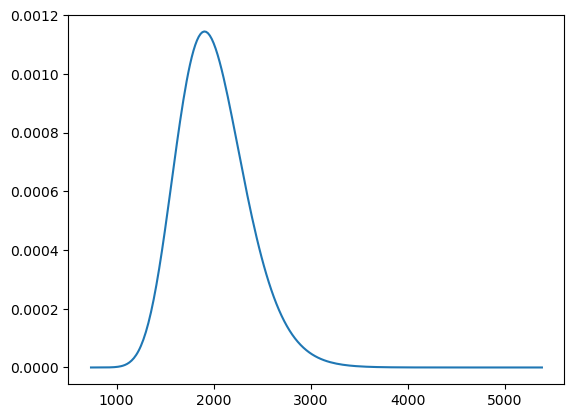

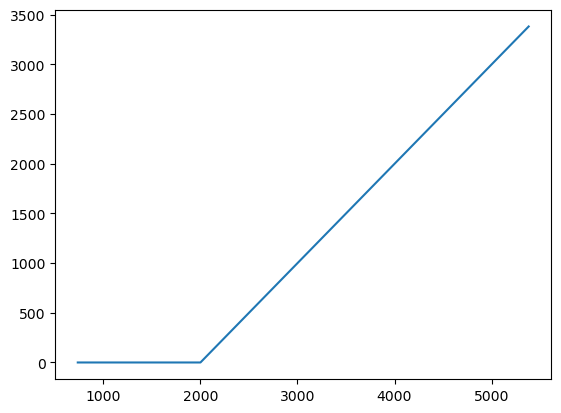

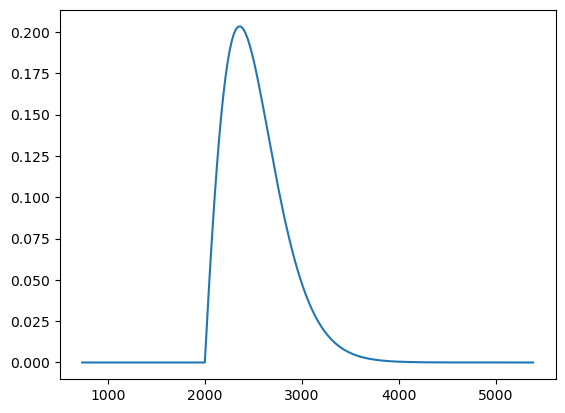

735.7588823428847
5436.563656918091


In [80]:
v_ = COS(a,b, S0, sigma, T, r, q, K)

In [81]:
v_

0.05773486845373722

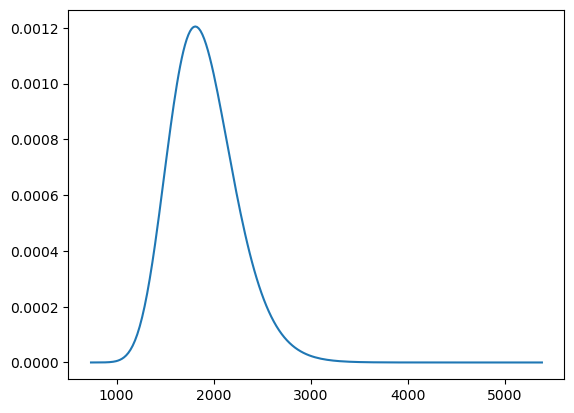

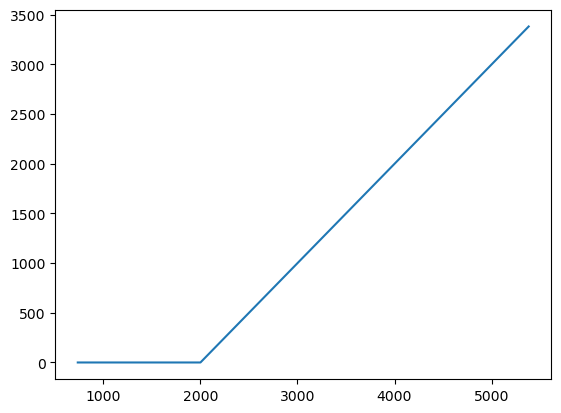

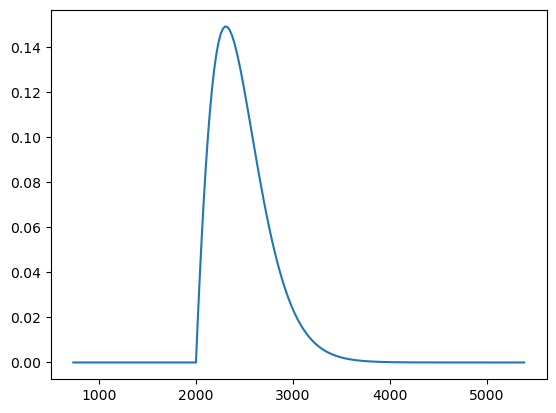

In [198]:
x= np.arange(-1,1, 0.01)
y =[]
y2 = []
x2=[]
y3=[]
for x_ in x:
    x2.append(K*np.exp(x_))
    y.append(f(x_,S0, sigma, T, r, q, K))
    #print(f(x_,S0, sigma, T, r, q))
    y2.append(value_T(x_, T, K))
    y3.append(value_T(x_, T, K)*f(x_,S0, sigma, T, r, q, K))
plt.plot(x2,y)
plt.show()
plt.plot(x2,y2)
plt.show()
plt.plot(x2,y3)
plt.show()

In [217]:
# second method

In [58]:
def phi_hat(nu, a, b,S0, sigma, T, r, q, K):
    value, erro = integrate.quad(lambda x: np.exp(complex(0,nu*x))* f(x,S0, sigma, T, r, q, K) , a, b)
    return value

def phi(nu, a, b,S0, sigma, T, r, q, K):
    return (np.exp(complex(-sigma**2*nu**2*T/2,(np.log(S0)+(r-q-sigma**2/2)*T)*nu)))

def Vk (k, a, b):
    value, error = integrate.quad(lambda y: max(K*(np.exp(y)-1),0)*np.cos(k*np.pi*(y-a)/(b-a)), a, b)
    value = 2*value/(b-a)
    return value
    
def Ak (k, a, b, S0, sigma, T, r, q, K):
    #f(y,S0, sigma, T, r, q, K)
    nu = k*np.pi/(b-a)
    ak = 2/(b-a)*np.real(phi(nu, a, b,S0, sigma, T, r, q, K)*np.exp(complex(0,-k*a*np.pi/(b-a))))
    #value, error = integrate.quad(lambda x: np.cos(k*(x-a)/(b-a))* f(x,S0, sigma, T, r, q, K) , a, b)
    #METTre phi 
    #ak = 2/(b-a)*value
    return ak

In [76]:
def COS2(a, b, S0, sigma, T, r, q, K, n):
    C = 1
    v = 0
    N = 2**n
    V = []
    A = []
    for k in range(N):
    #print(k)
        #print(Vk(k, a, b))
        #print(Ak (k, a, b, S0, sigma, T, r, q, K))
        
        if k !=0 :
            v+= Vk(k, a, b) * Ak (k, a, b, S0, sigma, T, r, q, K)
        else: 
            v+= Vk(k, a, b) * Ak (k, a, b, S0, sigma, T, r, q, K)/2
        A.append(Ak (k, a, b, S0, sigma, T, r, q, K))
        V.append(Vk(k, a, b))
        
    v = v * C*(b-a)/2
    print(v)
    return v, V, A
    

In [78]:
v, V, A = COS2(-1, 1, S0, sigma, T, r, q, K,4)
v, V, A = COS2(-4, 4, S0, sigma, T, r, q, K,6)
v, V, A = COS2(-8, 8, S0, sigma, T, r, q, K, 6)
v, V, A = COS2(-12, 12, S0, sigma, T, r, q, K, 6)

0.573391030698932
1240.6446675516183
3793384.0228683497
3661466.313946788


In [209]:
def phi(S0,r,q,sigma,T,u):
    phi = np.exp(1j*(np.log(S0) + (r-q-0.5*sigma**2)*T)*u-0.5*sigma**2*u**2*T)
    return phi
'''
def phi_hat(S0,r,q,sigma,T,u, a,b):
    def integ(x):
        inte = np.exp(1j*u*x-0.5*((x-np.log(S0)-(r-q-sigma**2/2)*T)/(sigma*np.sqrt(T)))**2)/(sigma*K*np.exp(x)*np.sqrt(2*np.pi*T)) 
        return (inte)
    phi = integrate.quad(integ, a,b)[0]
    return phi
'''
def phi_hat(S0,r,q,sigma,T,u, a,b):
    def integ(x):
        inte = np.exp(1j*u*x-0.5*((x-np.log(S0)-(r-q-sigma**2/2)*T)/(sigma*np.sqrt(T)))**2)/(sigma*np.sqrt(2*np.pi*T)) 
        return (inte)
    #print('integrate')
    #print(integrate.quad(integ, a,b))
    phi_real = integrate.quad(integ, a,b)[0]
    phi_imag = integrate.quad(lambda x: scipy.imag(integ(x)), a,b)[0]
    #print(phi)
    #
    phi = phi_real + 1j*phi_imag
    return phi


def fourier_cos(a, b, S0, sigma, T, r, q, K, n):
    
    N = 2**n
    A,V = np.zeros(N), np.zeros(N)
    
    for k in range(N):
        V[k] = 2*integrate.quad(lambda y: max(K*(np.exp(y)-1),0)*np.cos(k*np.pi*(y-a)/(b-a)), a, b)[0]/(b-a)
        A[k] = 2*np.real(phi(S0/K,r,q,sigma,T,(k*np.pi/(b-a)))*np.exp(-1j*k*a*np.pi/(b-a)))/(b-a)
        #print(phi(S0/K,r,q,sigma,T,(k*np.pi/(b-a))))
        #print(A[k])
    V[0] = V[0]/2
    result = (b-a)*sum(A*V)/2
    
    print(result)
    
    return(result)
    
def fourier_cos_hat(a, b, S0, sigma, T, r, q, K, n):
    
    N = 2**n
    A,V = np.zeros(N), np.zeros(N)
    
    for k in range(N):
        V[k] = 2*integrate.quad(lambda y: max(K*(np.exp(y)-1),0)*np.cos(k*np.pi*(y-a)/(b-a)), a, b)[0]/(b-a)
        
        A[k] = 2*np.real(phi_hat(S0/K,r,q,sigma,T,(k*np.pi/(b-a)),a,b)*np.exp(-1j*k*a*np.pi/(b-a)))/(b-a) 
        #print(phi_hat(S0/K,r,q,sigma,T,(k*np.pi/(b-a)),a,b))
        #print(A[k])
    V[0] = V[0]/2
    result = (b-a)*sum(A*V)/2
    
    print(result)
    
    return(result)
    

In [211]:
various_ab = [[-1,1], [-4,4], [-8,8], [-12,12]]

n=6

for ab in various_ab:
    a = ab[0]
    b = ab[1]
    
    fourier_cos(a, b, S0, sigma, T, r, q, K, n)

95.72411798010114
95.72493783441779
95.37945752594112
-22739.513671903747


In [212]:
various_ab = [[-1,1], [-4,4], [-8,8], [-12,12]]

n=6
for ab in various_ab:
    a = ab[0]
    b = ab[1]
    
    fourier_cos_hat(a, b, S0, sigma, T, r, q, K, n)

95.72411296998942
95.72493783441126
95.37945752597017
-22739.513671910296
